<a href="https://colab.research.google.com/github/CarolinaOliveira001/SupremeCourtJudgementPrediction/blob/main/Assignment9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving 414.edges to 414.edges


In [97]:
import networkx as nx
from random import sample
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, accuracy_score
import matplotlib.pyplot as plt

In [3]:
filenameFacebook = "414.edges"

graphFacebook = nx.Graph()
trueGraphFacebook = nx.Graph()

with open(filenameFacebook) as f:
    for line in f:
        x = line.split()
        a = int(x[0])
        b = int(x[1])
        
        if a not in list(graphFacebook.nodes):
            graphFacebook.add_node(a)
            trueGraphFacebook.add_node(a)
        if b not in list(graphFacebook.nodes):
            graphFacebook.add_node(b)
            trueGraphFacebook.add_node(b)

        graphFacebook.add_edge(a, b)
        trueGraphFacebook.add_edge(a, b)

In [4]:
random_edges = set(sample(list(graphFacebook.edges()), int(round(graphFacebook.number_of_edges()*10/100, 0))))

In [5]:
for edge in random_edges:
  graphFacebook.remove_edge(edge[0], edge[1])

In [6]:
graphFacebookWithoutRemovedEdges = list(graphFacebook.edges())

#Model

In [62]:
predictedModel = nx.adamic_adar_index(graphFacebook)

In [63]:
listOfPredictedEdges = []

for u, v, p in predictedModel:
    listOfPredictedEdges.append((u, v, p))

In [64]:
listOfPredictedEdges = sorted(listOfPredictedEdges, key=lambda tup: tup[2], reverse=True)

In [65]:
highestAdamicAdarModel = listOfPredictedEdges[0][2]

In [57]:
#listOfPredictedEdges = listOfPredictedEdges[:len(random_edges)]

In [67]:
listOfProbabilityEdges = []

for (a, b, p) in listOfPredictedEdges:
  listOfProbabilityEdges.append([(a, b), p/highestAdamicAdarModel])

In [61]:
#for edge in listOfPredictedEdges:
#  graphFacebook.add_edge(edge[0], edge[1])

In [50]:
#listOfPredictedEdges = [(a, b) for (a, b, p) in listOfPredictedEdges if p > 0.5]

In [207]:
#truePositive = 0
#falsePositive = 0

#for edge in listOfPredictedEdges:
#  if trueGraphFacebook.has_edge(edge[0], edge[1]):
#    truePositive = truePositive + 1
#  else:
#    falsePositive = falsePositive + 1

In [252]:
#complementOfTrueGraphFacebook = nx.complement(trueGraphFacebook)
#complementOfGraphFacebook = nx.complement(graphFacebook)

In [209]:
#falseNegative = 0
#trueNegative = 0
#
#for edge in list(complementOfGraphFacebook.edges()):
#  if complementOfTrueGraphFacebook.has_edge(edge[0], edge[1]):
#    trueNegative = trueNegative + 1
#  else:
#    falseNegative = falseNegative + 1

Accuracy

In [210]:
#accuracy = (truePositive + trueNegative) / (truePositive + falsePositive + trueNegative + falseNegative)

In [ ]:
#accuracy

Precision

In [212]:
#precision = truePositive / (truePositive + falsePositive)

In [ ]:
#precision

ROC

In [39]:
completetrueGraphFacebook = nx.complete_graph(trueGraphFacebook.nodes())

In [40]:
listOfAllPossibleEdges = list(completetrueGraphFacebook.edges())

In [41]:
for edge in graphFacebookWithoutRemovedEdges:
  listOfAllPossibleEdges.remove(edge)

In [42]:
listOfTrueGraphFacebooksEdges = []

for edge in listOfAllPossibleEdges:
  if edge in list(trueGraphFacebook.edges()):
    listOfTrueGraphFacebooksEdges.append(1)
  else:
    listOfTrueGraphFacebooksEdges.append(0)

In [77]:
listOfProbabilityGraphFacebooksEdges = []

for edgeA in listOfAllPossibleEdges:
  valueHelper = []
  for idx in range(0, len(listOfProbabilityEdges)):
    edgeB = listOfProbabilityEdges[idx][0]
    if edgeA == edgeB:
      valueHelper.append(listOfProbabilityEdges[idx][1])
    
  if len(valueHelper) == 0:
    listOfProbabilityGraphFacebooksEdges.append(0)
  else:
    listOfProbabilityGraphFacebooksEdges.append(valueHelper[0])

In [93]:
listOfGraphFacebooksEdges = []

for edgeA in listOfAllPossibleEdges:
  valueHelper = []
  for idx in range(0, len(listOfProbabilityEdges)):
    edgeB = listOfProbabilityEdges[idx][0]
    if edgeA == edgeB:
      if listOfProbabilityEdges[idx][1] > 0.5:
        valueHelper.append(1)
      else:
        valueHelper.append(0)
  
  if(len(valueHelper) == 0):
    listOfGraphFacebooksEdges.append(0)
  else:
    listOfGraphFacebooksEdges.append(valueHelper[0])

ROC

In [78]:
complementOfSpecificity, sensitivity, __ = roc_curve(listOfTrueGraphFacebooksEdges, listOfProbabilityGraphFacebooksEdges)

In [79]:
def plot_roc_curve(fpr, tpr):
    #fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

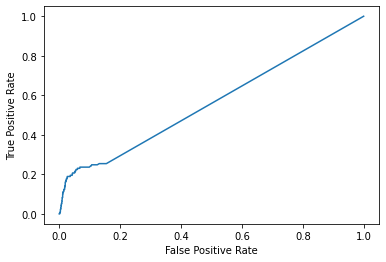

In [80]:
plot_roc_curve(complementOfSpecificity, sensitivity)

AUROC

In [81]:
print(f'model 1 AUC score: {roc_auc_score(listOfTrueGraphFacebooksEdges, listOfProbabilityGraphFacebooksEdges)}')

model 1 AUC score: 0.5628147508390235


Precision

In [95]:
precision = precision_score(listOfTrueGraphFacebooksEdges, listOfGraphFacebooksEdges)

In [96]:
precision

0.13333333333333333

Accuracy

In [98]:
accuracy = accuracy_score(listOfTrueGraphFacebooksEdges, listOfGraphFacebooksEdges)

In [99]:
accuracy

0.9745104134286603